In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("train.csv")

In [10]:
train=data[["text","target"]]

In [11]:
train

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [5]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
from string import punctuation
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")
stop_updated = stop_nltk + ["...","..","http","utc","//","co"] 

In [57]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [12]:
train["clean_text"]=train.text.apply(clean_txt)

C:\Users\ulleg\Anaconda3\envs\TF2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
train.head()

,text,target,clean_text
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive
1,Forest fire near La Ronge Sask. Canada,1,forest fire near ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,resident asked 'shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive wildfire evacuation orde..."
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...


In [14]:
from nltk.probability import FreqDist

In [15]:
reviewed_text=" ".join(train.text.values)
reviewed_text

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask. Canada All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 13,000 people receive #wildfires evacuation orders in California  Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas I'm on top of the hill and I can see a fire in the woods... There's an emergency evacuation happening now in the building across the street I'm afraid that the tornado is coming to our area... Three people died from the heat wave so far Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding #raining #flooding #Florida

In [16]:
from wordcloud import WordCloud
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).generate_from_text(reviewed_text)

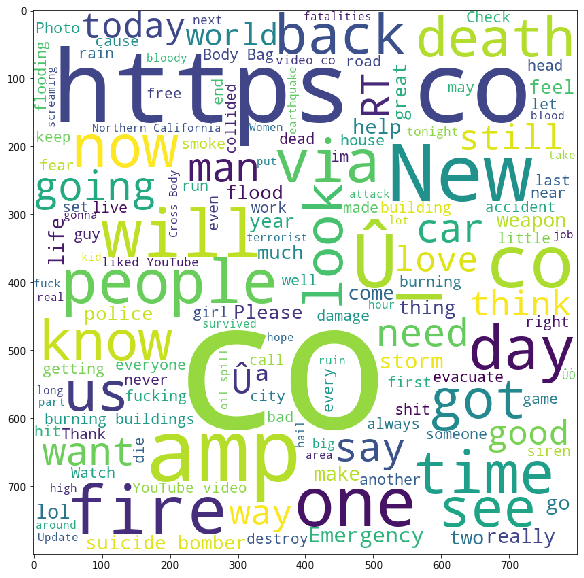

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(word_cloud)
plt.show()

# Building Model

In [20]:
train.head(5)

,text,target,clean_text
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive
1,Forest fire near La Ronge Sask. Canada,1,forest fire near ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,resident asked 'shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive wildfire evacuation orde..."
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...


In [21]:
X=train.clean_text
Y=train.target

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

In [23]:
Y.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [24]:
#Create a document term matrix
from sklearn.feature_extraction.text import \
CountVectorizer, TfidfVectorizer

In [25]:
count_vect = CountVectorizer()

In [26]:
tf_vect=TfidfVectorizer()

In [27]:
#Extract the features on the reviews for train - fit
#Compute the count of every word extarcted in every document(review)
X_train_bow = count_vect.fit_transform(X_train)

In [28]:
pd.DataFrame(X_train_bow.toarray(),columns=count_vect.get_feature_names())

,00,000,0000,00cy9vxeff,00end,00pm,01,02,02elqlopfk,02pm,...,ûïthe,ûïwe,ûïwhen,ûïyou,ûò,ûò800000,ûó,ûóher,ûókody,ûótech
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#For all the features extarcted, compute the 
#count in the test data set of reveiws
X_test_bow = count_vect.transform(X_test)

In [37]:
y_train_df=pd.DataFrame(y_train)


# KERAS

In [31]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score

In [32]:
x_input=np.array(X_train_bow.toarray())
x_input.shape

(5329, 15767)

In [38]:
y_label=np.array(y_train_df[['target']])
y_label.shape

(5329, 1)

In [39]:
#import keras lib
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout
from keras.layers import GaussianNoise


Using TensorFlow backend.


In [51]:
# INTIALIZING THE MODEL
mymodel=Sequential()

In [52]:
# adding Multiple layers

mymodel.add(Dense(units=300,input_dim=15767,activation="relu")) 
mymodel.add(Dropout(0.2))
mymodel.add(GaussianNoise(0.01, input_shape=(2,)))

mymodel.add(Dense(units=150,activation="relu"))   # adding one more layer
mymodel.add(Dropout(0.2))
mymodel.add(Dense(units=200,activation="relu"))   # adding one more layer
mymodel.add(Dropout(0.3))

mymodel.add(Dense(units=100,activation="relu"))   # adding one more layer
mymodel.add(Dropout(0.2))

#no need to tell the number of input_dim as it will take atoomaticaly from the previous layer
mymodel.add(Dense(units=50,activation="relu")) 


In [53]:

mymodel.add(Dense(units=1,activation="sigmoid")) 

#input_dim=No of input variables
#units= No of layers

In [54]:
mymodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 300)               4730400   
_________________________________________________________________
dropout_9 (Dropout)          (None, 300)               0         
_________________________________________________________________
gaussian_noise_3 (GaussianNo (None, 300)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 150)               45150     
_________________________________________________________________
dropout_10 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 200)               30200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 200)              

In [55]:
mymodel.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
# here there are many hyper parameters can be used or automatically defined, 
# eg: error rate can be defined here as exponential decay
# for binary class we use loss function as: "binary_crossentropy"

In [56]:
mymodel.fit(x_input,y_label,epochs=5)    #here it may be a forward or backword propogation

Epoch 1/5
5329/5329 [==============================] - 19s 4ms/step - loss: 0.5424 - accuracy: 0.7292
Epoch 2/5
5329/5329 [==============================] - 18s 3ms/step - loss: 0.2387 - accuracy: 0.9126
Epoch 3/5
5329/5329 [==============================] - 18s 3ms/step - loss: 0.0885 - accuracy: 0.9711
Epoch 4/5
5329/5329 [==============================] - 18s 3ms/step - loss: 0.0467 - accuracy: 0.9829
Epoch 5/5
5329/5329 [==============================] - 18s 3ms/step - loss: 0.0268 - accuracy: 0.9869


In [58]:
mymodel.evaluate(x_input,y_label)  # here the error will also be taken care other than accuracy
                                    # here it will be only forward propogation
                                    # it will compare with the y_label and give accuracy
                                    # It will be having bias and weights initialy defined in the fitting and then it will


5329/5329 [==============================] - 2s 460us/step


[0.017661083682946516, 0.9930568337440491]

In [59]:
mymodel.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])
# here there are many hyper parameters can be used or automatically defined, 
# eg: error rate can be defined here as exponential decay
# for binary class we use loss function as: "binary_crossentropy"

In [60]:
mymodel.fit(x_input,y_label,epochs=3)    #here it may be a forward or backword propogation

Epoch 1/3
5329/5329 [==============================] - 9s 2ms/step - loss: 0.0179 - accuracy: 0.9934
Epoch 2/3
5329/5329 [==============================] - 9s 2ms/step - loss: 0.0172 - accuracy: 0.9916
Epoch 3/3
5329/5329 [==============================] - 9s 2ms/step - loss: 0.0172 - accuracy: 0.9910


In [61]:
mymodel.evaluate(x_input,y_label)  # here the error will also be taken care other than accuracy


5329/5329 [==============================] - 2s 438us/step


[0.015475731957575595, 0.9928691983222961]

In [62]:
# We caan see that adam gives better accuracy ovwe SGD
